In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("soil-moisture.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     224 non-null    object 
 1   Day       224 non-null    int64  
 2   avg_pm1   224 non-null    float64
 3   avg_pm2   224 non-null    float64
 4   avg_pm3   224 non-null    float64
 5   avg_am    224 non-null    float64
 6   avg_lum   224 non-null    float64
 7   avg_temp  224 non-null    float64
 8   avg_humd  224 non-null    float64
 9   avg_pres  224 non-null    float64
 10  avg_sm    224 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 19.4+ KB


<AxesSubplot:>

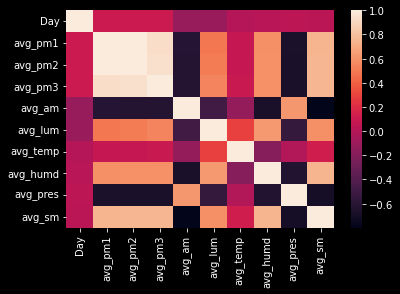

In [4]:
sns.heatmap(df.corr())

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['avg_sm'],axis=1),df['avg_sm'],test_size=0.2)

In [6]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

<AxesSubplot:>

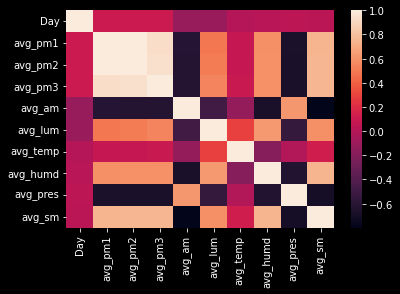

In [13]:
plt.Figure(figsize=(25,12))
sns.heatmap(df.corr())

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [16]:
df.head(2)

,Month,Day,avg_pm1,avg_pm2,avg_pm3,avg_am,avg_lum,avg_temp,avg_humd,avg_pres,avg_sm
0,Jul,18,3.548400,5.929200,24.940800,0.0,2208.880000,21.660300,90.785900,92940.33720,7435.450000
1,Jul,19,3.416827,6.403133,116.188916,0.0,3241.160643,23.232932,85.260723,92980.24438,7292.257028


In [26]:
trf1 = ColumnTransformer([('ohe-month',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0])
                          ],remainder='passthrough')

In [20]:
trf2 = ColumnTransformer([('standard Scaler',StandardScaler(),slice(0,19))
                          ],remainder='passthrough')

In [22]:
trf3 = RandomForestRegressor()

In [28]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [29]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe-month',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 19, None))])),
                ('trf3', RandomForestRegressor())])

In [31]:
y_pred = pipe.predict(x_test)

In [40]:
pipe.score(x_test,y_test)

0.9197280261284767

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9197280261284767

In [43]:
import pickle

In [44]:
pickle.dump(pipe,open('soil moisture prediction.pkl','wb'))

In [46]:
x_train.columns

Index(['Month', 'Day', 'avg_pm1', 'avg_pm2', 'avg_pm3', 'avg_am', 'avg_lum',
       'avg_temp', 'avg_humd', 'avg_pres'],
      dtype='object')

In [48]:
x_train.head()

,Month,Day,avg_pm1,avg_pm2,avg_pm3,avg_am,avg_lum,avg_temp,avg_humd,avg_pres
85,Oct,11,1.313636,2.093182,48.842273,0.000000,3380.238636,23.154886,93.250568,93162.43511
127,Nov,22,1.110000,1.670000,38.550000,1.466667,3023.986111,22.249444,67.647778,93242.87778
59,Sep,15,1.485146,2.360485,55.042718,0.015534,3203.058252,22.039417,96.030194,93281.28078
173,Jan,7,1.040000,1.460000,33.520000,1.500000,789.708333,15.612500,97.820417,93719.63167
176,Jan,22,0.986610,1.337797,31.906949,1.220339,1976.067797,20.623898,62.611525,93359.56661


In [49]:
y_train

85     6351.227273
127     559.361111
59     7222.922330
173     359.083333
176     342.254237
          ...     
40     6697.504202
42     6211.883333
223     326.652174
34     7025.161538
200     333.890909
Name: avg_sm, Length: 179, dtype: float64

In [53]:
Month =input("Enter Month")
Day = input("Enter Day")
pm1 = input("Enter pm1")
pm2 = input("Enter pm2")
pm3 = input("Enter pm3")
am = input("Enter am")
lum = input("Enter lum")
temp =input("Enter temp")
humd =input("Enter humd")
pres =input("Enter pres")
list = [Month, Day, pm1,pm2, pm3, am,lum,
       temp, humd,pres]
input = pd.DataFrame(list,columns=['Month', 'Day', 'avg_pm1', 'avg_pm2', 'avg_pm3', 'avg_am', 'avg_lum','avg_temp', 'avg_humd', 'avg_pres'])

ValueError: Shape of passed values is (10, 1), indices imply (10, 10)

In [54]:
list

['Oct',
 '11',
 '1.29',
 '2.09',
 '48.84',
 '0',
 '3380.24',
 '23.15',
 '93.25',
 '93162.41']

In [58]:
pd.DataFrame([list])

,0,1,2,3,4,5,6,7,8,9
0,Oct,11,1.29,2.09,48.84,0,3380.24,23.15,93.25,93162.41
